In [41]:
#from google.colab import drive
#drive.mount('/content/drive')

%pip install pandas
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



In [42]:
import pandas as pd
data = pd.read_csv("train.csv", sep=',')
data.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


DATA ANALYSIS












1.   Missing and NaN values



In [43]:
num_nan=data.isna().sum()
print(num_nan)
#delete missing values during the training phase


id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64


In [44]:
data=data.dropna()

In [45]:
num_nan=data.isna().sum()
print(num_nan)

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64


In [46]:
data

,id,date,country,store,product,num_sold
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [47]:
features =data[['id','date','country','store','product','num_sold']]
target=data['num_sold']

In [48]:
features['date']=pd.to_datetime(features['date'])

In [49]:
features['date']

1        2010-01-01
2        2010-01-01
3        2010-01-01
4        2010-01-01
5        2010-01-01
            ...    
230125   2016-12-31
230126   2016-12-31
230127   2016-12-31
230128   2016-12-31
230129   2016-12-31
Name: date, Length: 221259, dtype: datetime64[ns]

In [50]:
features['day']=features['date'].dt.day

In [51]:
features['month']=features['date'].dt.month
features['year']=features['date'].dt.year

In [52]:
features

,id,date,country,store,product,num_sold,day,month,year
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,1,1,2010
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,1,1,2010
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,1,1,2010
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,1,1,2010
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,1,1,2010
...,...,...,...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,31,12,2016
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,31,12,2016
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,31,12,2016
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,31,12,2016


In [53]:
target

1          973.0
2          906.0
3          423.0
4          491.0
5          300.0
           ...  
230125     466.0
230126    2907.0
230127    2299.0
230128    1242.0
230129    1622.0
Name: num_sold, Length: 221259, dtype: float64

In [54]:
features=features.drop(columns=['date'])
features

,id,country,store,product,num_sold,day,month,year
1,1,Canada,Discount Stickers,Kaggle,973.0,1,1,2010
2,2,Canada,Discount Stickers,Kaggle Tiers,906.0,1,1,2010
3,3,Canada,Discount Stickers,Kerneler,423.0,1,1,2010
4,4,Canada,Discount Stickers,Kerneler Dark Mode,491.0,1,1,2010
5,5,Canada,Stickers for Less,Holographic Goose,300.0,1,1,2010
...,...,...,...,...,...,...,...,...
230125,230125,Singapore,Premium Sticker Mart,Holographic Goose,466.0,31,12,2016
230126,230126,Singapore,Premium Sticker Mart,Kaggle,2907.0,31,12,2016
230127,230127,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,31,12,2016
230128,230128,Singapore,Premium Sticker Mart,Kerneler,1242.0,31,12,2016


2.Feature engineering

In [55]:
#trial with ohe to encode categorical features + elaborate why
categorical=features.select_dtypes(exclude=["number","bool_"])
numeric=features._get_numeric_data().columns#verify
print('cat : ',categorical)
print('numeric',numeric)

cat :            country                 store             product
1          Canada     Discount Stickers              Kaggle
2          Canada     Discount Stickers        Kaggle Tiers
3          Canada     Discount Stickers            Kerneler
4          Canada     Discount Stickers  Kerneler Dark Mode
5          Canada     Stickers for Less   Holographic Goose
...           ...                   ...                 ...
230125  Singapore  Premium Sticker Mart   Holographic Goose
230126  Singapore  Premium Sticker Mart              Kaggle
230127  Singapore  Premium Sticker Mart        Kaggle Tiers
230128  Singapore  Premium Sticker Mart            Kerneler
230129  Singapore  Premium Sticker Mart  Kerneler Dark Mode

[221259 rows x 3 columns]
numeric Index(['id', 'num_sold', 'day', 'month', 'year'], dtype='object')


In [56]:
cols=list(features.columns.values)
cols

['id', 'country', 'store', 'product', 'num_sold', 'day', 'month', 'year']

In [57]:
columns=list(categorical.columns.values)

In [58]:
#ohe
features_encoded=pd.get_dummies(features,columns=columns)
features_encoded

,id,num_sold,day,month,year,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Discount Stickers,store_Premium Sticker Mart,store_Stickers for Less,product_Holographic Goose,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode
1,1,973.0,1,1,2010,True,False,False,False,False,False,True,False,False,False,True,False,False,False
2,2,906.0,1,1,2010,True,False,False,False,False,False,True,False,False,False,False,True,False,False
3,3,423.0,1,1,2010,True,False,False,False,False,False,True,False,False,False,False,False,True,False
4,4,491.0,1,1,2010,True,False,False,False,False,False,True,False,False,False,False,False,False,True
5,5,300.0,1,1,2010,True,False,False,False,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230125,230125,466.0,31,12,2016,False,False,False,False,False,True,False,True,False,True,False,False,False,False
230126,230126,2907.0,31,12,2016,False,False,False,False,False,True,False,True,False,False,True,False,False,False
230127,230127,2299.0,31,12,2016,False,False,False,False,False,True,False,True,False,False,False,True,False,False
230128,230128,1242.0,31,12,2016,False,False,False,False,False,True,False,True,False,False,False,False,True,False




3.   Study the nature of the relationship between variables/target




In [59]:
correlation_matrix=features_encoded.corr()

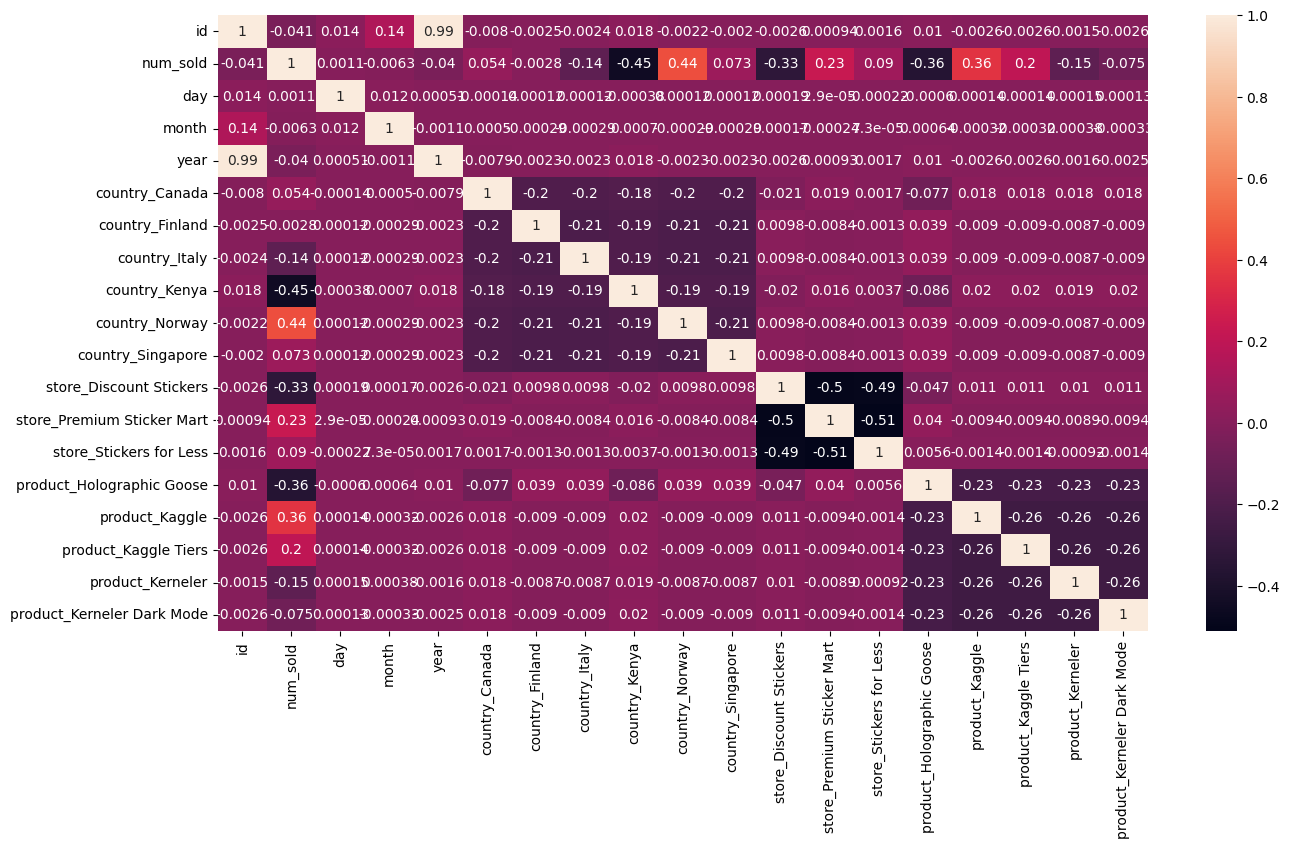

In [81]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8)) 
sns.heatmap(correlation_matrix,annot=True,)
plt.show()

In [61]:
features_encoded

,id,num_sold,day,month,year,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Discount Stickers,store_Premium Sticker Mart,store_Stickers for Less,product_Holographic Goose,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode
1,1,973.0,1,1,2010,True,False,False,False,False,False,True,False,False,False,True,False,False,False
2,2,906.0,1,1,2010,True,False,False,False,False,False,True,False,False,False,False,True,False,False
3,3,423.0,1,1,2010,True,False,False,False,False,False,True,False,False,False,False,False,True,False
4,4,491.0,1,1,2010,True,False,False,False,False,False,True,False,False,False,False,False,False,True
5,5,300.0,1,1,2010,True,False,False,False,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230125,230125,466.0,31,12,2016,False,False,False,False,False,True,False,True,False,True,False,False,False,False
230126,230126,2907.0,31,12,2016,False,False,False,False,False,True,False,True,False,False,True,False,False,False
230127,230127,2299.0,31,12,2016,False,False,False,False,False,True,False,True,False,False,False,True,False,False
230128,230128,1242.0,31,12,2016,False,False,False,False,False,True,False,True,False,False,False,False,True,False


In [62]:
target

1          973.0
2          906.0
3          423.0
4          491.0
5          300.0
           ...  
230125     466.0
230126    2907.0
230127    2299.0
230128    1242.0
230129    1622.0
Name: num_sold, Length: 221259, dtype: float64

correlation with the target


In [72]:
target_corr=features_encoded.corr()['num_sold'].drop('num_sold')
print(max(target_corr))

0.44457330457201166


In [82]:
target_corr

id                           -0.040866
day                           0.001137
month                        -0.006255
year                         -0.040462
country_Canada                0.054136
country_Finland              -0.002843
country_Italy                -0.139527
country_Kenya                -0.449873
country_Norway                0.444573
country_Singapore             0.073334
store_Discount Stickers      -0.325233
store_Premium Sticker Mart    0.231209
store_Stickers for Less       0.089933
product_Holographic Goose    -0.361666
product_Kaggle                0.356331
product_Kaggle Tiers          0.197389
product_Kerneler             -0.145131
product_Kerneler Dark Mode   -0.075360
Name: num_sold, dtype: float64

In [73]:
l=list(target_corr)

In [79]:
import numpy as np
print(l)
min_corr_coef=min(np.abs(l))
max_corr_coef=max(l)


[-0.040866100319440844, 0.0011365848368361292, -0.0062546180853265245, -0.04046180912524411, 0.054135587065181436, -0.002842525219375655, -0.13952675026386233, -0.44987299392397834, 0.44457330457201166, 0.07333438839135879, -0.3252329699225139, 0.2312092509656692, 0.08993302504741628, -0.3616659863561335, 0.35633087856379225, 0.19738936333676127, -0.1451311185417855, -0.07535965187370786]


In [80]:
print(min_corr_coef)
print(max_corr_coef)

0.0011365848368361292
0.44457330457201166


In [83]:
# id and year seem to be highly correlated 0.99
features_encoded=features_encoded.drop(columns=['year'])

In [84]:
features_encoded

,id,num_sold,day,month,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Discount Stickers,store_Premium Sticker Mart,store_Stickers for Less,product_Holographic Goose,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode
1,1,973.0,1,1,True,False,False,False,False,False,True,False,False,False,True,False,False,False
2,2,906.0,1,1,True,False,False,False,False,False,True,False,False,False,False,True,False,False
3,3,423.0,1,1,True,False,False,False,False,False,True,False,False,False,False,False,True,False
4,4,491.0,1,1,True,False,False,False,False,False,True,False,False,False,False,False,False,True
5,5,300.0,1,1,True,False,False,False,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230125,230125,466.0,31,12,False,False,False,False,False,True,False,True,False,True,False,False,False,False
230126,230126,2907.0,31,12,False,False,False,False,False,True,False,True,False,False,True,False,False,False
230127,230127,2299.0,31,12,False,False,False,False,False,True,False,True,False,False,False,True,False,False
230128,230128,1242.0,31,12,False,False,False,False,False,True,False,True,False,False,False,False,True,False


The variables are not highly correlated with the target(coefficient under 0.5) ,let's check non-linear relationship between variables

In [95]:
#cols.remove('year')
cols=list(features_encoded.columns.values)
cols

['id',
 'num_sold',
 'day',
 'month',
 'country_Canada',
 'country_Finland',
 'country_Italy',
 'country_Kenya',
 'country_Norway',
 'country_Singapore',
 'store_Discount Stickers',
 'store_Premium Sticker Mart',
 'store_Stickers for Less',
 'product_Holographic Goose',
 'product_Kaggle',
 'product_Kaggle Tiers',
 'product_Kerneler',
 'product_Kerneler Dark Mode']

In [97]:
cols.remove('num_sold')

In [98]:
cols

['id',
 'day',
 'month',
 'country_Canada',
 'country_Finland',
 'country_Italy',
 'country_Kenya',
 'country_Norway',
 'country_Singapore',
 'store_Discount Stickers',
 'store_Premium Sticker Mart',
 'store_Stickers for Less',
 'product_Holographic Goose',
 'product_Kaggle',
 'product_Kaggle Tiers',
 'product_Kerneler',
 'product_Kerneler Dark Mode']

In [101]:
%pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.1 MB 8.0 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/11.1 MB 8.1 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/11.1 MB 7.9 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.1 MB 7.8 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 8.0 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.1 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 7.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   - -------------------------------------- 1.6/43.6 MB 7.1 MB/s eta 0:00:06
   -- ------------------------------------- 2.9/43.6 MB 7.1 MB/s eta 0:00:06
   ---- ----------------------------------- 4.7/43.6 MB 7.4 MB/s eta 0:00:06
   ------ --------------------------------- 6.6/43.6 MB 7.7 MB/s eta 0:00:05
   ------- -

In [102]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler=StandardScaler()
X=scaler.fit_transform(features_encoded[cols])

X_train,X_test,y_train,y_test=train_test_split(X,features_encoded['num_sold'], test_size=0.2, random_state=42)





first model decision tree regression


In [103]:
model_tree=DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [104]:
from sklearn.metrics import mean_absolute_percentage_error as mape
predictions=model_tree.predict(X_test)
score =mape(y_test,predictions)


In [105]:
score

0.09466430077461914